<a href="https://colab.research.google.com/github/shaadfazal/Overlapped-Cervical-Cell-Region-Segmentation/blob/main/Cervical_overlapped_seg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset creation for Meta-Polyp model training to segment overlapped portion of cervical cells. Enter the source image directory (source_image_dir) in the code block as the overlapping cervical cell image directory to be used as the input, you can use the input.zip file has the overlapping cervical cell images has the images used in the project with shape (256,256,3). (source_mask_dir) is the location of the ground truth overlapped portion segmentation masks, 'overlap_mask.zip' contain the segmentation masks used in the project, with the shape (256,256,1). The code creates a training folder consistent to be used with the Meta-Polyp model code, with input overlapping cervical cell images in folder image and corresponding overlapped portion masks in folder mask

In [ ]:
from PIL import Image
import os
import shutil

# Set the paths for input_color and overlap_mask folders
input_color_path = 'enter path to source overlapping cervical cell image'
overlap_mask_path = 'enter path to source overlapped portion of cervical cells segmentation mask'

# Create the parent folder dataset_metapolyp
dataset_path = 'enter path to folder where you want the dataset forraining to be saved at '
os.makedirs(dataset_path, exist_ok=True)

# Create train and test directories inside dataset_metapolyp
train_path = os.path.join(dataset_path, 'train')
test_path = os.path.join(dataset_path, 'test')

os.makedirs(os.path.join(train_path, 'image'), exist_ok=True)
os.makedirs(os.path.join(train_path, 'mask'), exist_ok=True)
os.makedirs(os.path.join(test_path, 'image'), exist_ok=True)
os.makedirs(os.path.join(test_path, 'mask'), exist_ok=True)

# Function to resize an image to 256x256 pixels
def resize_image(image_path, output_path):
    with Image.open(image_path) as img:
        # Resize the image to 256x256 pixels
        resized_img = img.resize((256, 256))
        # Save the resized image
        resized_img.save(output_path)

# Function to copy images and masks to the train or test folders
def copy_files(source_folder, destination_folder, start_index, end_index):
    for i in range(start_index, end_index + 1):
        # Copy and resize images
        image_source_path = os.path.join(input_color_path, f'{i}.png')
        image_destination_path = os.path.join(destination_folder, 'image', f'{i}.png')
        resize_image(image_source_path, image_destination_path)

        # Copy masks
        mask_source_path = os.path.join(overlap_mask_path, f'{i}.png')
        mask_destination_path = os.path.join(destination_folder, 'mask', f'{i}.png')
        shutil.copy(mask_source_path, mask_destination_path)

# Copy images and masks to train folder (1.png to 400.png)
copy_files(input_color_path, train_path, 1, 400)

# Copy remaining images and masks to test folder (401.png to 500.png)
copy_files(input_color_path, test_path, 401, 500)

# Verify the contents of the dataset_metapolyp folder
print("Contents of dataset_metapolyp folder:")
print(os.listdir(dataset_path))


Contents of dataset_metapolyp folder:
['train', 'test']


Code to check the shape of an image file if needed to ensure compatibility

In [ ]:
import cv2

# Specify the image path
image_path = ''

# Read the image and get its dimensions
img = cv2.imread(image_path)
if img is not None:
    height, width, channels = img.shape
    print(f"Image Dimensions: Height = {height}, Width = {width}, Channels = {channels}")
else:
    print(f"Failed to read the image: {image_path}")


Image Dimensions: Height = 256, Width = 256, Channels = 3


The Meta Polyp model github repository used can be found at https://github.com/huyquoctrinh/MetaPolyp-CBMS2023

Code implementation of the work cited as follows:

@misc{trinh2023metapolyp,
    title={Meta-Polyp: a baseline for efficient Polyp segmentation},
    author={Quoc-Huy Trinh},
    year={2023},
    eprint={2305.07848},
    archivePrefix={arXiv},
    primaryClass={eess.IV}
}

@INPROCEEDINGS{10178713,
    author = {Q. Trinh},
    booktitle = {2023 IEEE 36th International Symposium on Computer-Based Medical Systems (CBMS)},
    title = {Meta-Polyp: A Baseline for Efficient Polyp Segmentation},
    year = {2023},
    pages = {742-747},
    doi = {10.1109/CBMS58004.2023.00312},
    url = {https://doi.ieeecomputersociety.org/10.1109/CBMS58004.2023.00312},
    publisher = {IEEE Computer Society},
    address = {Los Alamitos, CA, USA},
    month = {jun}
}


Training Meta-Polyp model for segmentation

Cloning Meta Polyp repository from github

We use different version of the files 'callbacks.py', 'dataloader.py' from the cloned repository to cater to our dataset so for our implementation you can replace the contents of the cloned file with our version of the files which are uploaded in our repository.

Changes made basically allow compatibility with .png files, adding and editing the early stopping criterion for training that works for our dataset, and to augment the training data to facilitate training for the number of images available in our dataset.

In [ ]:
!git clone https://github.com/huyquoctrinh/MetaPolyp-CBMS2023.git

Cloning into 'MetaPolyp-CBMS2023'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 102 (delta 49), reused 18 (delta 0), pack-reused 0
Receiving objects: 100% (102/102), 2.24 MiB | 10.72 MiB/s, done.
Resolving deltas: 100% (49/49), done.


We also use our version of 'train.py' file uploaded in our repository. Make sure to edit the path variables 'route', 'X_path', and 'Y_path' according to your sytems and environment

We also have created our version of 'predict.py' file to check the model prediction on an individual input image. Changes have to be made for model path and input image path according to your systems and environment.

We have created a python script that can run the segmentation model trained to predict and save the corresponding segmentation masks as images for over a folder of input images and named it 'predict_dataset_github' you can upload the file in your working directory and edit the path variables to use it as well.

In [ ]:
pwd

'/content'

In [ ]:
import os

# Specify the path to the directory containing the script
#change the script directory according to your system and environment
script_directory = '/content/MetaPolyp-CBMS2023'

# Change the current working directory to the script directory
os.chdir(script_directory)




In [ ]:
pwd

'/content/MetaPolyp-CBMS2023'

In [ ]:
pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.5/572.5 kB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 78.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 94.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 53.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tensorflow-datasets to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 91.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!python /content/MetaPolyp-CBMS2023/train.py

2024-05-15 20:22:28.112660: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-15 20:22:28.242017: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-05-15 20:22:28.242048: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-05-15 20:22:29.055961: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object f

In [ ]:
from google.colab import files

# Download the CSV file
files.download('training.csv')


In [ ]:
from google.colab import files

# Download the model summary file
files.download('modelsummary.txt')


In [ ]:
from google.colab import files

# Provide the path to your model file
model_path = "/content/best_model.h5"

# Trigger the download
files.download(model_path)

In [ ]:
!python /content/MetaPolyp-CBMS2023/predict.py

2024-02-09 07:03:22.761379: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-09 07:03:22.913713: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.10/dist-packages/cv2/../../lib64:/usr/local/lib/python3.10/dist-packages/cv2/../../lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-02-09 07:03:22.913747: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-02-09 07:03:23.730552: W tensorflow/compiler/xla/stream_executo

In [ ]:
!python /content/MetaPolyp-CBMS2023/predict_dataset_github.py

2024-05-27 18:32:32.300867: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-27 18:32:32.451587: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.10/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2024-05-27 18:32:32.451630: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-05-27 18:32:33.413366: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7

The base directory is the folder which contains three folders, 'input' that contains the overlapping cervical cell images, 'pred_metapolyp2' folder contains predictions of overlapped portion of mask by the Meta-Polyp model, and 'overlap_mask' contains the ground truth segmentation masks. In all of these three folders image dataset is split into train and test folders with train folder containing images '1.png' to '400.png' and test folder contains '401.png' to '500.png'. Change the path variables according to your system and environment.

The segmentation methodology used is taken inspiration from the resource https://www.tensorflow.org/tutorials/images/segmentation and modified for our task and dataset.

Overlap refined modified U-Net

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
import numpy as np
from PIL import Image
from natsort import natsorted

# Define the base directory path
base_directory = '/content/drive/MyDrive/Dataset3/'

folder_names = ['input', 'pred_metapolyp2', 'overlap_mask']

input_train = []
input_test = []
pred_metapolyp2_train = []
pred_metapolyp2_test = []
overlap_mask_train = []
overlap_mask_test = []

for folder_name in folder_names:
    # Define train and test paths
    dataset_path = os.path.join(base_directory, 'Dataset_split', folder_name)
    train_path = os.path.join(dataset_path, 'train')
    test_path = os.path.join(dataset_path, 'test')

    if os.path.exists(train_path):
        train_files = natsorted(os.listdir(train_path))  # Sort the file names
        for file_name in train_files:
            file_path = os.path.join(train_path, file_name)
            image = np.array(Image.open(file_path).convert('L')) / 255.0  # Convert to grayscale and normalize to [0, 1]
            eval(f'{folder_name}_train').append(image)

    # Read and append images from test folder
    if os.path.exists(test_path):
        test_files = natsorted(os.listdir(test_path))  # Sort the file names
        for file_name in test_files:
            file_path = os.path.join(test_path, file_name)
            image = np.array(Image.open(file_path).convert('L')) / 255.0  # Convert to grayscale and normalize to [0, 1]
            eval(f'{folder_name}_test').append(image)


input_train = np.array(input_train)
input_test = np.array(input_test)
pred_metapolyp_train = np.array(pred_metapolyp2_train)
pred_metapolyp_test = np.array(pred_metapolyp2_test)
overlap_mask_train = np.array(overlap_mask_train)
overlap_mask_test = np.array(overlap_mask_test)

ipf_train = np.stack([input_train+pred_metapolyp_train, pred_metapolyp_train, input_train], axis=-1)
ipf_test = np.stack([input_test+pred_metapolyp_test, pred_metapolyp_test, input_test], axis=-1)

ipft_train = ipf_train
ipft_test = ipf_test


Mounted at /content/drive


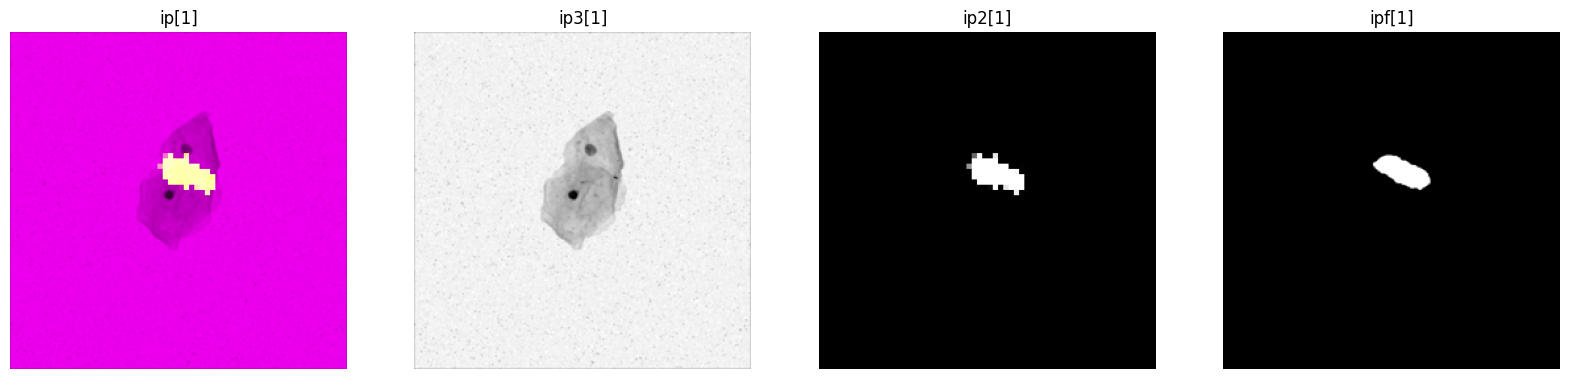

In [ ]:
import matplotlib.pyplot as plt
n = 301
# Assuming ip, ip3, ip2, and ipf are your arrays
ip_image = ipf_train[n]
ip3_image = input_train[n]
ip2_image = pred_metapolyp2_train[n]
ipf_image = overlap_mask_train[n]

# Create a subplot with one row and four columns
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Display images in the subplot
axs[0].imshow(ip_image, cmap='gray')
axs[0].set_title('ip[1]')

axs[1].imshow(ip3_image, cmap='gray')
axs[1].set_title('ip3[1]')

axs[2].imshow(ip2_image, cmap='gray')
axs[2].set_title('ip2[1]')

axs[3].imshow(ipf_image, cmap='gray')
axs[3].set_title('ipf[1]')

# Remove axis labels
for ax in axs:
    ax.axis('off')

plt.show()


In [ ]:
TRAIN_LENGTH = 400
BATCH_SIZE = 30
BUFFER_SIZE = 20
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

In [ ]:
import tensorflow as tf

# Assuming 'union' and 'uniont' are NumPy arrays
# Convert them to TensorFlow tensors
ipf_train = tf.constant(ipf_train, dtype=tf.float32)
overlap_train = tf.constant(overlap_mask_train, dtype=tf.uint8)

# Create a tf.data.Dataset
dataset = tf.data.Dataset.from_tensor_slices((ipf_train, overlap_train))

# Assuming the images are of shape (128, 128, 3) and labels are of shape (128, 128, 1)
# The shape is specified in the element_spec argument
element_spec = (tf.TensorSpec(shape=(256, 256, 3), dtype=tf.float32),
                tf.TensorSpec(shape=(256, 256, 1), dtype=tf.uint8))

# Create the parallel map dataset
train_images_t = dataset.map(lambda x, y: (x, tf.expand_dims(y, axis=-1)), num_parallel_calls=tf.data.AUTOTUNE)

# Check the element_spec of train_images
print(train_images_t.element_spec)


(TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(256, 256, 1), dtype=tf.uint8, name=None))


In [ ]:
import tensorflow as tf

# Assuming 'union' and 'uniont' are NumPy arrays
# Convert them to TensorFlow tensors
ipf_test = tf.constant(ipf_test, dtype=tf.float32)
overlap_test = tf.constant(overlap_mask_test, dtype=tf.uint8)

# Create a tf.data.Dataset
dataset = tf.data.Dataset.from_tensor_slices((ipf_test, overlap_test))

# Assuming the images are of shape (128, 128, 3) and labels are of shape (128, 128, 1)
# The shape is specified in the element_spec argument
element_spec = (tf.TensorSpec(shape=(256, 256, 3), dtype=tf.float32),
                tf.TensorSpec(shape=(256, 256, 1), dtype=tf.uint8))

# Create the parallel map dataset
test_images_t = dataset.map(lambda x, y: (x, tf.expand_dims(y, axis=-1)), num_parallel_calls=tf.data.AUTOTUNE)

# Check the element_spec of train_images
print(test_images_t.element_spec)

(TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(256, 256, 1), dtype=tf.uint8, name=None))


Build the input pipeline:

In [ ]:
train_batches = (
    train_images_t
    .cache()
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE)
    .repeat()
    .prefetch(buffer_size=tf.data.AUTOTUNE))

test_batches = test_images_t.batch(BATCH_SIZE)

In [ ]:
test_batches

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 256, 256, 1), dtype=tf.uint8, name=None))>

Visualize an image example and its corresponding mask from the dataset:

In [ ]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()

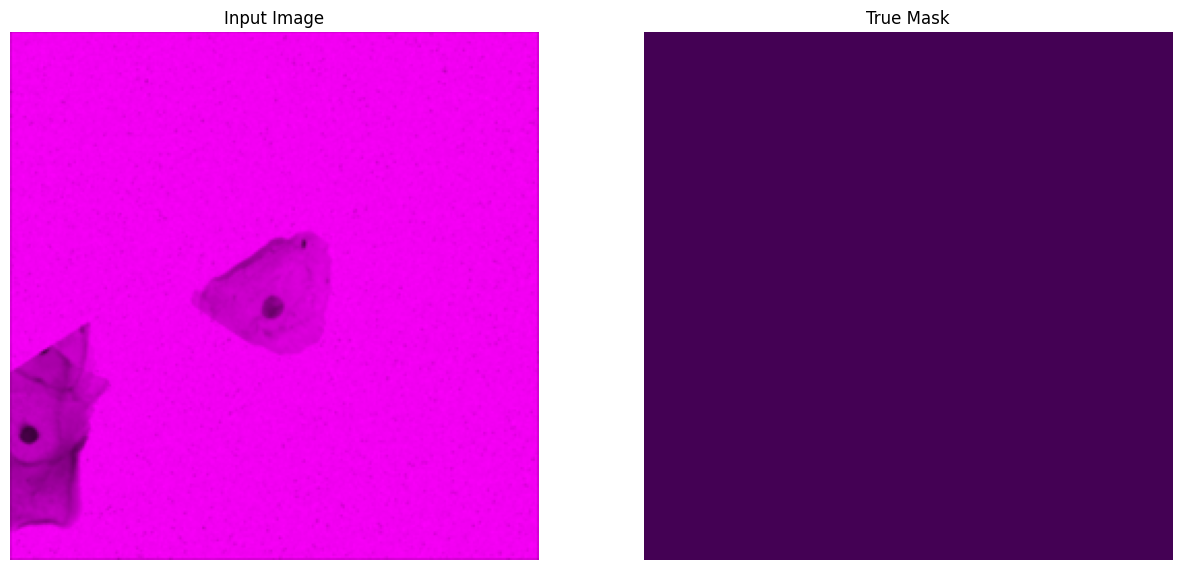

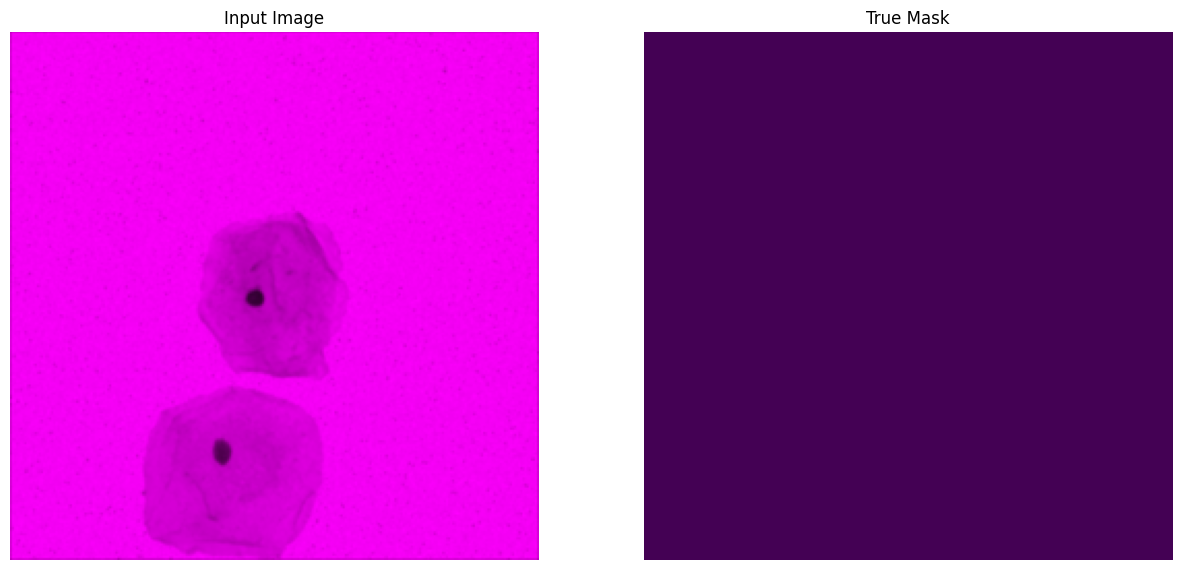

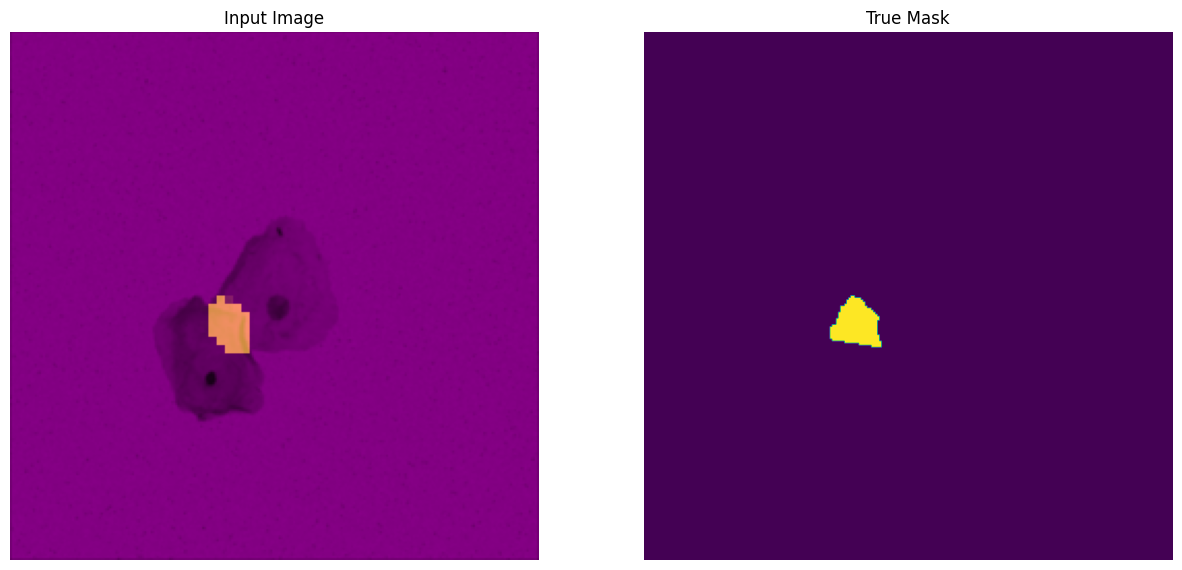

In [ ]:
for images, masks in train_batches.take(3):
  sample_image, sample_mask = images[0], masks[0]
  display([sample_image, sample_mask])

## Define the model
The model being used here is a modified [U-Net](https://arxiv.org/abs/1505.04597). A U-Net consists of an encoder (downsampler) and decoder (upsampler). To learn robust features and reduce the number of trainable parameters, use a pretrained model—[MobileNetV2](https://arxiv.org/abs/1801.04381)—as the encoder. For the decoder, you will use the upsample block, which is already implemented in the [pix2pix](https://github.com/tensorflow/examples/blob/master/tensorflow_examples/models/pix2pix/pix2pix.py) example in the TensorFlow Examples repo. (Check out the [pix2pix: Image-to-image translation with a conditional GAN](../generative/pix2pix.ipynb) tutorial in a notebook.)


In [ ]:
import tensorflow as tf
from tensorflow_examples.models.pix2pix import pix2pix

# Load the MobileNetV2 model with the new input shape
base_model = tf.keras.applications.MobileNetV2(input_shape=[256, 256, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 128x128
    'block_3_expand_relu',   # 64x64
    'block_6_expand_relu',   # 32x32
    'block_13_expand_relu',  # 16x16
    'block_16_project',      # 8x8
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)
down_stack.trainable = False

# Upsampling layers
up_stack = [
    pix2pix.upsample(512, 3),  # 8x8 -> 16x16
    pix2pix.upsample(256, 3),  # 16x16 -> 32x32
    pix2pix.upsample(128, 3),  # 32x32 -> 64x64
    pix2pix.upsample(64, 3),   # 64x64 -> 128x128
]

def unet_model(output_channels: int):
    inputs = tf.keras.layers.Input(shape=[256, 256, 3])
    # Downsampling through the model
    skips = down_stack(inputs)
    x = skips[-1]
    skips = reversed(skips[:-1])

    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])

    # This is the last layer of the model
    last = tf.keras.layers.Conv2DTranspose(
        filters=output_channels, kernel_size=3, strides=2,
        padding='same')  # 128x128 -> 256x256

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)


9406464/9406464 [==============================] - 1s 0us/step


## Train the model

Now, all that is left to do is to compile and train the model.

Since this is a multiclass classification problem, use the `tf.keras.losses.SparseCategoricalCrossentropy` loss function with the `from_logits` argument set to `True`, since the labels are scalar integers instead of vectors of scores for each pixel of every class.

When running inference, the label assigned to the pixel is the channel with the highest value. This is what the `create_mask` function is doing.

In [ ]:
OUTPUT_CLASSES = 2

model = unet_model(output_channels=OUTPUT_CLASSES)
# Assuming you have a model and you are compiling it
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


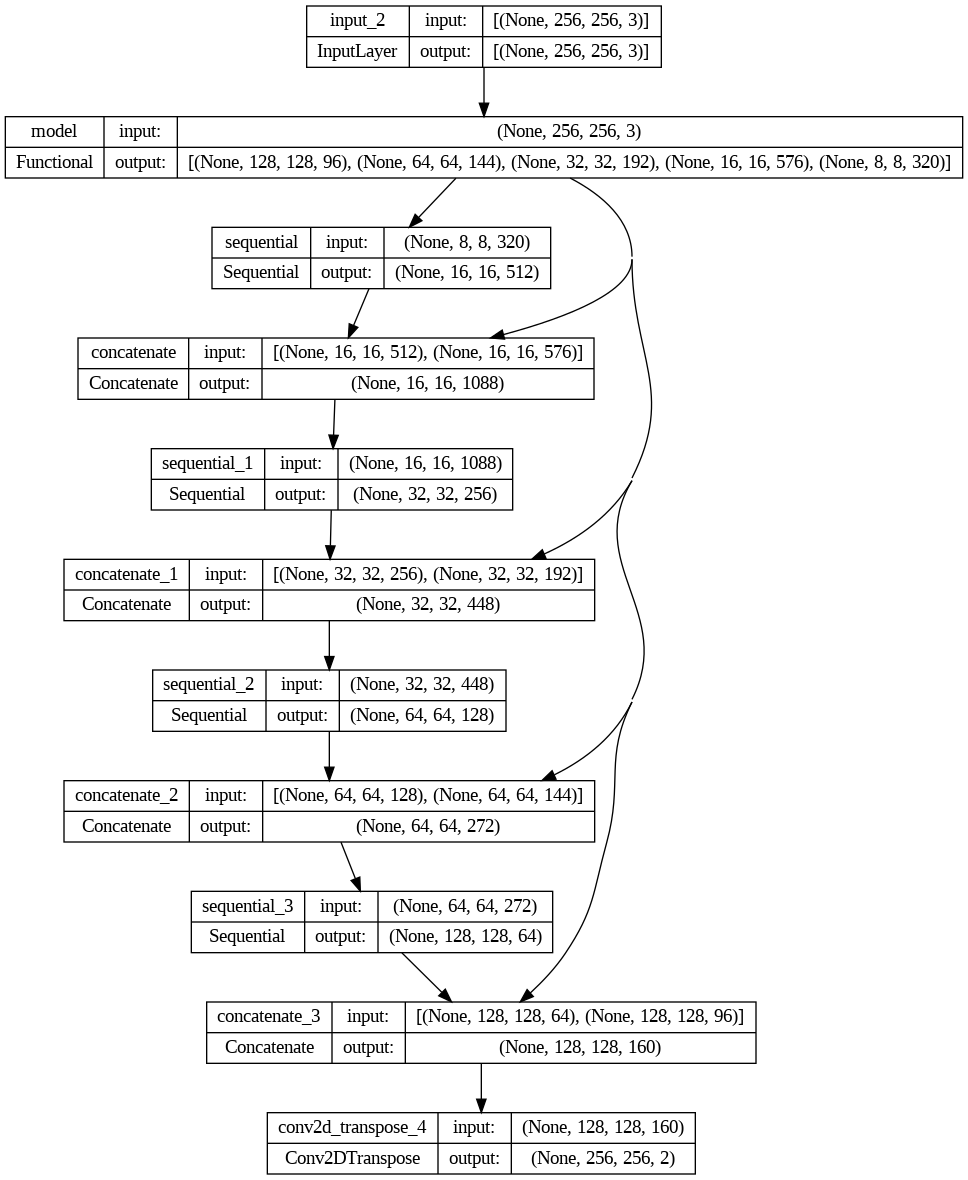

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

Try out the model to check what it predicts before training:

In [ ]:
def create_mask(pred_mask):
  pred_mask = tf.math.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]

In [ ]:
def show_predictions(dataset=None, num=1):
  if dataset:
    for image, mask in dataset.take(num):
      pred_mask = model.predict(image)
      display([image[0], mask[0], create_mask(pred_mask)])
  else:
    display([sample_image, sample_mask,
             create_mask(model.predict(sample_image[tf.newaxis, ...]))])

In [ ]:
show_predictions()

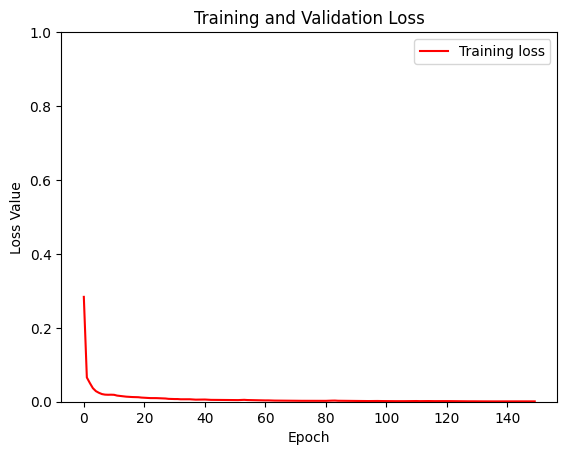

In [ ]:
loss = model_history.history['loss']


plt.figure()
plt.plot(model_history.epoch, loss, 'r', label='Training loss')

plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Assuming ipf_train and ipf_test are arrays of images
# Example: ipf_train = np.array([...]), ipf_test = np.array([...])

# Define the base directory
base_directory = './model_overlap/Mobilenetv2'

# Create train and test directories
train_directory = os.path.join(base_directory, 'train')
test_directory = os.path.join(base_directory, 'test')
os.makedirs(train_directory, exist_ok=True)
os.makedirs(test_directory, exist_ok=True)

# Function to create and save mask for a given image array
def create_and_save_mask(image_array, save_path):
    # Perform predictions for the current image
    pred = model.predict(np.expand_dims(image_array, axis=0))

    # Extract the predicted mask using create_mask function
    pred_mask = create_mask(pred)

    # Display the predicted mask with 'gray' colormap without axes
    plt.imshow(pred_mask, cmap='gray')
    plt.axis('off')  # Turn off axes
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)  # Save as PNG
    plt.close()

# Iterate over the image arrays in train
for i, image_array in enumerate(ipft_train):
    save_path = os.path.join(train_directory, f'{i + 1}.png')  # Adjust the filename as needed
    create_and_save_mask(image_array, save_path)

print("Model predictions saved for train set.")

# Iterate over the image arrays in test
for i, image_array in enumerate(ipft_test):
    save_path = os.path.join(test_directory, f'{i + 401}.png')  # Adjust the filename as needed
    create_and_save_mask(image_array, save_path)

print("Model predictions saved for test set.")
